`cv2.imread()` 이미지 파일을 읽습니다. 이미지 파일의 경로는 절대/상대경로가 가능

In [4]:
import cv2
cv2.imread?

Docstring:
imread(filename[, flags]) -> retval
.   @brief Loads an image from a file.
.   
.   @anchor imread
.   
.   The function imread loads an image from the specified file and returns it. If the image cannot be
.   read (because of missing file, improper permissions, unsupported or invalid format), the function
.   returns an empty matrix ( Mat::data==NULL ).
.   
.   Currently, the following file formats are supported:
.   
.   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
.   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Note* section)
.   -   JPEG 2000 files - \*.jp2 (see the *Note* section)
.   -   Portable Network Graphics - \*.png (see the *Note* section)
.   -   WebP - \*.webp (see the *Note* section)
.   -   Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm (always supported)
.   -   PFM files - \*.pfm (see the *Note* section)
.   -   Sun rasters - \*.sr, \*.ras (always supported)
.   -   TIFF files - \*.tiff, \*.tif (see the *Note* section)
.  

`cv2.imread(fileName, flag)`

Parameters :
* fileName (str)  이미지파일의 경로
* flag (int)  이미지 파일을 읽을 때의 Option.

Return :
* image object's array
* type : numpy.ndarray

flag
* 1 : `cv2.IMREAD_COLOR` (default)
* 0 : `cv2.IMREAD_GRAY`
* -1 : `cv2.IMREAD_UNCHAGED` alpha channel까지 포함하여 읽어 들입니다.


# Histogram in OpenCV

* BINS : 
    * 히스토그램 그래프의 X축의 간격입니다. 
    *  그림의 경우에는 0 ~ 255를 표현하였기 때문에 BINS값은 256이 됩니다. 
    * BINS값이 16이면 0 ~ 15, 16 ~ 31..., 240 ~ 255와 같이 X축이 16개로 표현이 됩니다. 
    * OpenCV에서는 BINS를 histSize 라고 표현합니다.
* DIMS : 
    * 이미지에서 조사하고자하는 값을 의미합니다. 
    * 빛의 강도를 조사할 것인지, RGB값을 조사할 것인지를 결정합니다.
* RANGE : 
    * 측정하고자하는 값의 범위입니다. 
    * 즉, X축의 from ~ to로 이해할 수 있습니다.

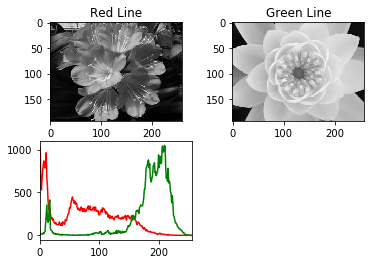

In [6]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

# to histogram with intensity of pixe, load image with cv2.IMREAD_GRAY 
img1 = cv2.imread('./images/flower1.jpg',0) 
img2 = cv2.imread('./images/flower2.jpg',0)

hist1 = cv2.calcHist([img1],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img2],[0],None,[256],[0,256])

#plt.style.use('dark_background')
plt.subplot(221),plt.imshow(img1,'gray'),plt.title('Red Line')
plt.subplot(222),plt.imshow(img2,'gray'),plt.title('Green Line')
plt.subplot(223),plt.plot(hist1,color='r'),plt.plot(hist2,color='g')
plt.xlim([0,256])
plt.show()

In [7]:
cv2.calcHist?

Docstring:
calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
.   @overload
Type:      builtin_function_or_method


* image  : 분석대상 이미지(uint8 or float32 type). Array형태.
* channels : 분석 채널(X축의 대상). 이미지가 graysacle이면 [0], color 이미지이면 [0,2] 형태(0 : Blue, 1: Green, 2: Red)
* mask : 이미지의 분석영역. None이면 전체 영역.
* histSize : BINS 값. [256]
* ranges : Range값. [0,256]

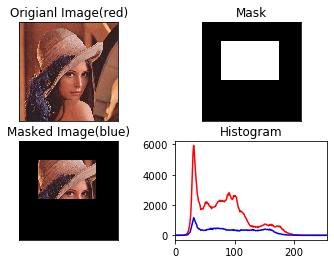

In [8]:
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('./images/lena.png');

# mask생성
mask = np.zeros(img.shape[:2],np.uint8)
mask[100:300,100:400] = 255

# 이미지에 mask가 적용된 결과
masked_img = cv2.bitwise_and(img,img,mask=mask)

# 원본 이미지의 히스토그램 green
hist_full = cv2.calcHist([img],[1],None,[256],[0,256])

# mask를 적용한 히스트로그램 green
hist_mask = cv2.calcHist([img],[1],mask,[256],[0,256])

# bgr > rgb
#b,g,r = cv2.split(img) # divide img into b,g,r
#img = cv2.merge([r,g,b])
#b,g,r = cv2.split(masked_img)
#masked_img = cv2.merge([r,g,b])
img = img[:,:,::-1]
masked_img = masked_img[:,:,::-1]

#plt.style.use('dark_background')
plt.subplot(221),plt.imshow(img,'gray'),plt.title('Origianl Image(red)'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(mask,'gray'),plt.title('Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(masked_img,'gray'),plt.title('Masked Image(blue)'), plt.xticks([]), plt.yticks([])

# red는 원본이미지 히스토그램, blue는 mask적용된 히스토그램
plt.subplot(224),plt.title('Histogram')
plt.plot(hist_full,color='r'),plt.plot(hist_mask,color='b')
plt.xlim([0,256])

plt.show()

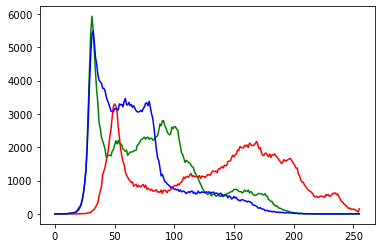

In [9]:
# opencv : BGR
# numpy, matplot : RGB
plt.figure()
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist_full, color='r')
hist_full = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(hist_full, color='g')
hist_full = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(hist_full, color='b')
plt.show()

In [10]:
img.shape

(512, 512, 3)

# Histogram Stretching

* Histogram 이 전구간에 펼쳐져서 나타나도록 늘려주는 기법.
* 전체적인 contrast를 향상시켜줌

$$
\textbf{dst}(x,y) 
= 
I_{max} 
\frac{ \textbf{src}(x,y) - \textbf{min}(\textbf{src(:)})} 
{\textbf{max}(\textbf{src(:)})-\textbf{min}(\textbf{src(:)})}
$$

256
256


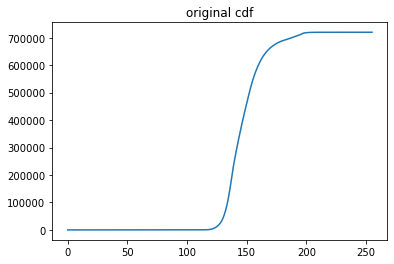

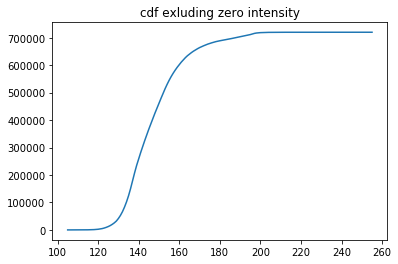

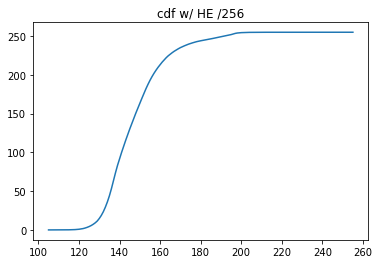

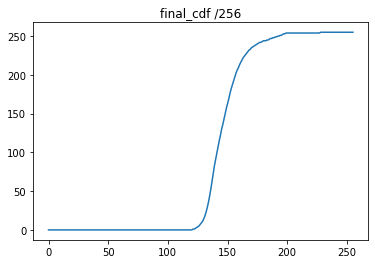

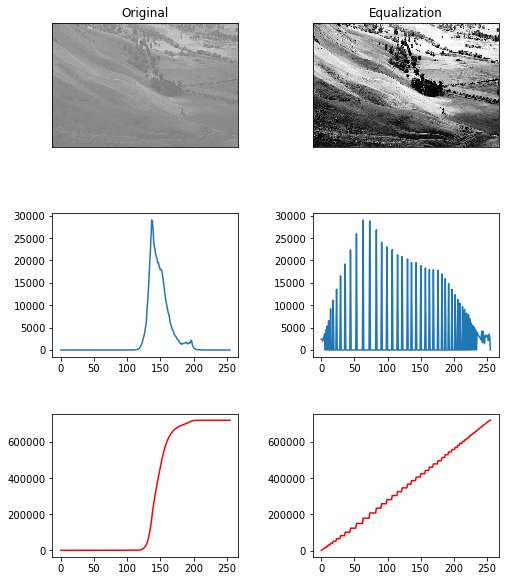

In [12]:
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('./images/hist_unequ.jpg');

hist, bins = np.histogram(img.flatten(), 256,[0,256])

cdf = hist.cumsum()
plt.figure()
plt.title('original cdf')
plt.plot(cdf)


# cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
# mask처리가 되면 Numpy 계산에서 제외가 됨
# 아래는 cdf array에서 값이 0인 부분을 mask처리함
cdf_m = np.ma.masked_equal(cdf,0)
plt.figure()
plt.title('cdf exluding zero intensity')
plt.plot(cdf_m)

#History Equalization 공식
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
plt.figure()
plt.title('cdf w/ HE /'+str(len(cdf_m)))
plt.plot(cdf_m)
print(len(cdf_m))

# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')
plt.figure()
plt.title('final_cdf /'+str(len(cdf)))
plt.plot(cdf)
print(len(cdf))
img2 = cdf[img]


plt.figure(figsize=(8,10))
#plt.style.use('dark_background')
plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.subplot(321),plt.imshow(img),plt.title('Original')
plt.xticks([]),plt.yticks([])
plt.subplot(322),plt.imshow(img2),plt.title('Equalization')
plt.xticks([]),plt.yticks([])

hist, bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
plt.subplot(323),plt.plot(hist)
plt.subplot(325),plt.plot(cdf, color='r')

hist, bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
plt.subplot(324),plt.plot(hist)
plt.subplot(326),plt.plot(cdf, color='r')

plt.show()


# Histogram Equalization

* Histogram stretching 에 추가적으로 pixel의 분포값이 전영역에 고르게 분포되도록 뭉쳐있는 곳은 넓은 간격으로 histogram이 떨어지도록 조정.

* Histogram 누적 함수.
$$
\textbf{cdf}(g) = \Sigma_{0\le i \le g} h(i)
$$

* 결과 이미지의 값은 다음 수식으로 결정됨.
$$
\textbf{dst}(x,y) = round \left( I_{max} \frac{\textbf{cdf}((\textbf{src}(x,y))}{N} \right)
$$

  * 여기서 $I_{max}$는 pixel이 가질 수 있는 최대 intensity임.



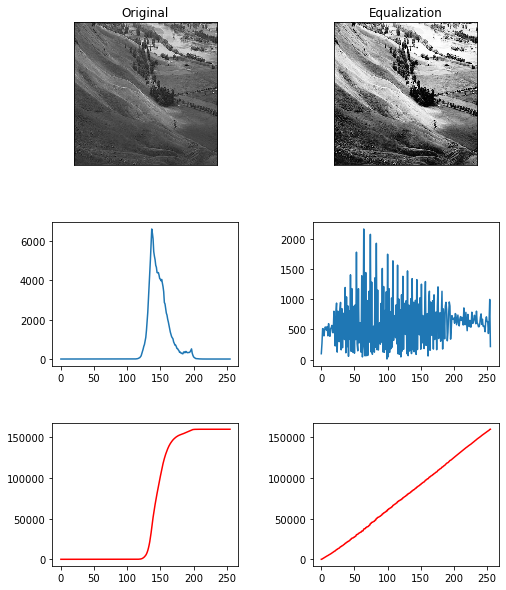

In [42]:
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('./images/hist_unequ.jpg',0);

# OpenCV의 Equaliztion함수
img2 = cv2.equalizeHist(img)
img = cv2.resize(img,(400,400))
img2 = cv2.resize(img2,(400,400))

#dst = np.hstack((img, img2))
#plt.imshow(dst,'gray')

plt.figure(figsize=(8,10))
#plt.style.use('dark_background')
plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.subplot(321),plt.imshow(img,'gray'),plt.title('Original')
plt.xticks([]),plt.yticks([])
plt.subplot(322),plt.imshow(img2,'gray'),plt.title('Equalization')
plt.xticks([]),plt.yticks([])

hist, bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
plt.subplot(323),plt.plot(hist)
plt.subplot(325),plt.plot(cdf, color='r')

hist, bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
plt.subplot(324),plt.plot(hist)
plt.subplot(326),plt.plot(cdf, color='r')

plt.show()

# CLAHE (Contrast Limited Adaptive Histogram Equalization)

지금까지의 처리는 이미지의 전체적인 부분에 균일화를 적용하였습니다. 하지만 일반적인 이미지는 밝은 부분과 어두운 부분이 섞여 있기 때문에 전체에 적용하는 것은 그렇게 유용하지 않습니다. 아래 결과를 보시면 이해가 될겁니다.


(<matplotlib.axes._subplots.AxesSubplot at 0x7f09e14f5110>,
 [<matplotlib.lines.Line2D at 0x7f09e1c470d0>])

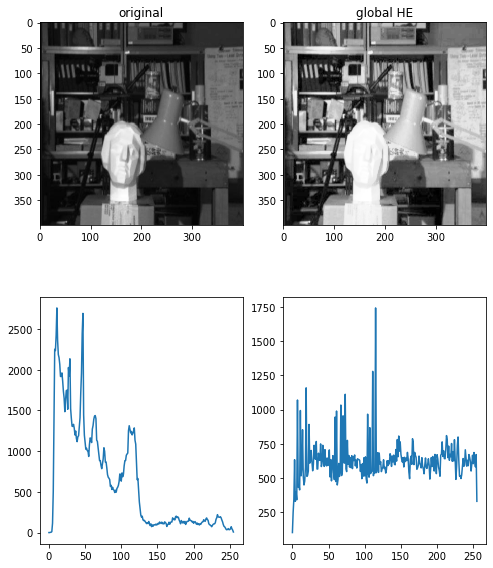

In [20]:
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('./images/clahe.png',0);

# OpenCV의 Equaliztion함수
img2 = cv2.equalizeHist(img)
img =  cv2.resize(img,(400,400))
img2 = cv2.resize(img2,(400,400))

dst = np.hstack((img, img2))
plt.figure(figsize=(8,10))
plt.imshow(dst,'gray')

plt.subplot(221), plt.imshow(img,'gray'), plt.title('original')
plt.subplot(222), plt.imshow(img2,'gray'), plt.title('global HE')
hist,bins = np.histogram(img,256,[0,256])
plt.subplot(223), plt.plot(hist)

hist,bins = np.histogram(img2,256,[0,256])
plt.subplot(224), plt.plot(hist)


It is true that the background contrast has improved after histogram equalization. 

But compare **the face of statue** in both images. 
* We lost most of the information there due to over-brightness. 
* It is because its histogram is not confined to a particular region as we saw in previous cases (Try to plot histogram of input image, you will get more intuition).

So to solve this problem, **adaptive histogram equalization** is used. 

In this,
* image is divided into small blocks called "tiles" (tileSize is 8x8 by default in OpenCV). 
* Then each of these blocks are histogram equalized as usual. 
  * So in a small area, histogram would confine to a small region (unless there is noise). 
  * If noise is there, it will be amplified. 
* To avoid this, contrast limiting is applied. 
  * If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), 
  * those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. 
* After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f09e0574810>,
 [<matplotlib.lines.Line2D at 0x7f09e04a7610>])

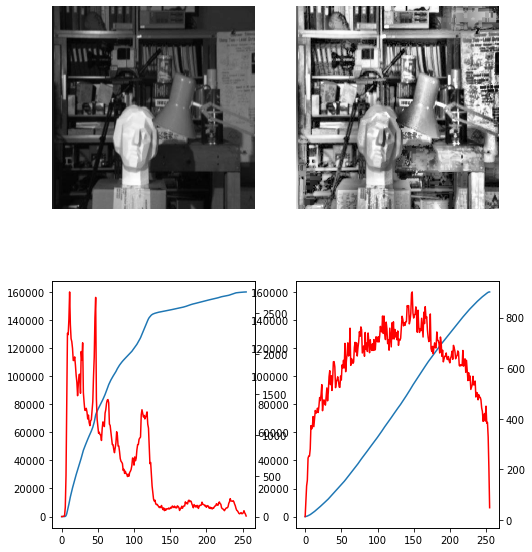

In [40]:
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('./images/clahe.png',0);

# contrast limit가 2이고 title의 size는 8X8 <-(tileGridSize=(8,8))
clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(8,8))
#clahe = cv2.createCLAHE( tileGridSize=(8,8))
img2 = clahe.apply(img)

img = cv2.resize(img,(400,400))
img2 = cv2.resize(img2,(400,400))


plt.figure(figsize=(8,10))
plt.subplot(221), plt.imshow(img,'gray'), plt.axis("off")
plt.subplot(222), plt.imshow(img2,'gray'),plt.axis("off")
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
plt.subplot(223), plt.plot(cdf), plt.twinx().plot(hist,color='r')

hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
plt.subplot(224), plt.plot(cdf),plt.twinx().plot(hist,color='r')
